<a href="https://colab.research.google.com/github/shobhitatiwari/Data-science/blob/master/BMV_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded= files.upload()

Saving bmw_pricing_challenge.csv to bmw_pricing_challenge.csv


#Model to predict car price (value / regression prediction)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data=pd.read_csv("bmw_pricing_challenge.csv")

In [ ]:
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,01-02-2012,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,01-01-2018
1,BMW,M4,13929,317,01-04-2016,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,01-02-2018
2,BMW,320,183297,120,01-04-2012,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,01-02-2018
3,BMW,420,128035,135,01-07-2014,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,01-02-2018
4,BMW,425,97097,160,01-12-2014,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,01-04-2018


In [ ]:
data.isna().sum() #Good news-no missing values

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [ ]:
data.shape

(4843, 18)

In [ ]:
data.describe(include='all')

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
count,4843,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000,4843
unique,1,75,NaN,NaN,199,4,10,8,2,2,2,2,2,2,2,2,NaN,9
top,BMW,320,NaN,NaN,01-07-2013,diesel,black,estate,True,True,False,False,False,False,True,True,NaN,01-05-2018
freq,4843,752,NaN,NaN,173,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,2620,NaN,809
mean,NaN,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15828.081767,NaN
std,NaN,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9220.285684,NaN
min,NaN,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN
25%,NaN,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10800.000000,NaN
50%,NaN,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14200.000000,NaN
75%,NaN,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18600.000000,NaN


for categorical values,  
##Label encoding or One Hot Encoding
, How to decide?

In [ ]:
print(data.duplicated().sum())

print(data.duplicated(['model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at']).sum())

0
0


In [ ]:
bool_f=data.select_dtypes('boolean').columns

for col in bool_f:
  print(col, data[col].unique())

feature_1 [ True False]
feature_2 [ True False]
feature_3 [False  True]
feature_4 [False  True]
feature_5 [ True False]
feature_6 [ True False]
feature_7 [ True False]
feature_8 [False  True]


In [ ]:
for col in bool_f:
  data[col]=data[col].apply(lambda x : 1 if x==True else 0)

data[bool_f]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,1,1,0,0,1,1,1,0
1,1,1,0,0,0,1,1,1
2,0,0,0,0,1,0,1,0
3,1,1,0,0,1,1,1,1
4,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...
4838,0,1,0,0,0,0,1,0
4839,0,1,0,0,0,0,1,1
4840,0,1,0,0,0,0,1,1
4841,1,1,0,0,0,0,1,1


In [ ]:
#model_key, fuel , paint_color, car_type

#categorical_features=
data.select_dtypes(['object']).columns

Index(['maker_key', 'model_key', 'registration_date', 'fuel', 'paint_color',
       'car_type', 'sold_at'],
      dtype='object')

In [ ]:
categorical_features=['model_key', 'fuel', 'paint_color', 'car_type']
data[categorical_features]

,model_key,fuel,paint_color,car_type
0,118,diesel,black,convertible
1,M4,petrol,grey,convertible
2,320,diesel,white,convertible
3,420,diesel,red,convertible
4,425,diesel,silver,convertible
...,...,...,...,...
4838,218 Gran Tourer,diesel,black,van
4839,218 Active Tourer,diesel,grey,van
4840,218 Gran Tourer,diesel,grey,van
4841,218 Active Tourer,diesel,brown,van


In [ ]:
# distinct values for each categorical features
for col in categorical_features:
    print(col, data[col].unique(), '=>', data[col].nunique())

model_key ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' '225 Active Tourer'
 '214 Gran Tourer'] => 75
fuel ['diesel' 'petrol' 'hybrid_petrol' 'electro'] => 4
paint_color ['black' 'grey' 'white' 'red' 'silver' 'blue' 'orange' 'beige' 'brown'
 'green'] => 10
car_type ['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 'van'] => 8


In [ ]:
#Since 'Fuel' column has weight on which price depends , thus label encoding
data.groupby('fuel')['price'].agg(['mean','median']) # order (1:petrol, 2:diesel, 3:electro, 4:hybrid_petrol)

,mean,median
fuel,,
diesel,15846.110752,14300
electro,20966.666667,20900
hybrid_petrol,37575.000000,25000
petrol,14398.429319,11900


In [ ]:
fuel_list=[]

for x in data.fuel.unique():
  fuel_list.append(data[data.fuel==x]['price'].mean())
  #print(data[data.fuel==x]['price'].mean())
print(dict(zip(data.fuel.unique() ,fuel_list)))

{'diesel': 15846.110751993105, 'petrol': 14398.429319371728, 'hybrid_petrol': 37575.0, 'electro': 20966.666666666668}


Encoding fuel types

In [ ]:
data['fuel_e']= data.fuel.map({'petrol':1, 'diesel':2, 'electro':3, 'hybrid_petrol':4})

In [ ]:
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,fuel_e
0,BMW,118,140411,100,01-02-2012,diesel,black,convertible,1,1,0,0,1,1,1,0,11300,01-01-2018,2
1,BMW,M4,13929,317,01-04-2016,petrol,grey,convertible,1,1,0,0,0,1,1,1,69700,01-02-2018,1
2,BMW,320,183297,120,01-04-2012,diesel,white,convertible,0,0,0,0,1,0,1,0,10200,01-02-2018,2
3,BMW,420,128035,135,01-07-2014,diesel,red,convertible,1,1,0,0,1,1,1,1,25100,01-02-2018,2
4,BMW,425,97097,160,01-12-2014,diesel,silver,convertible,1,1,0,0,0,1,1,1,33400,01-04-2018,2


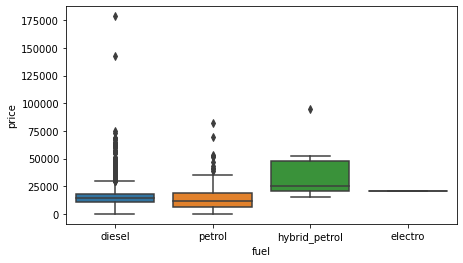

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x=data.fuel, y=data.price)

In [ ]:
data.groupby('paint_color')['price'].agg(['mean','median'])

,mean,median
paint_color,,
beige,15817.073171,13700
black,16173.851806,14500
blue,15114.929577,13250
brown,15367.741935,13900
green,7200.000000,6950
grey,15595.744681,14000
orange,18866.666667,17400
red,16500.000000,13200
silver,14816.109422,14400


In [ ]:
print(data['car_type'].unique())

print(data.groupby('car_type')['price'].agg(['mean','median'])) #subcompact, estate, hatchback, van, sedan, convertible, suv, coupe 

#mean and median show differences between sedan & convertible, meaning?? how to decide weight now?

['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 'van']
                     mean  median
car_type                         
convertible  17136.170213   12400
coupe        22172.115385   22750
estate       13112.141968   13000
hatchback    13289.413448   11900
sedan        16017.465753   14800
subcompact    9521.367521    9300
suv          21496.124764   17700
van          14350.000000   15200
